<a href="https://colab.research.google.com/github/sanjivyash/SHALA2020/blob/master/Yash_Sanjeev_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [0]:
url = 'https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L9/assignment_shala_clustering.csv'
data = pd.read_csv(url, error_bad_lines=False)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


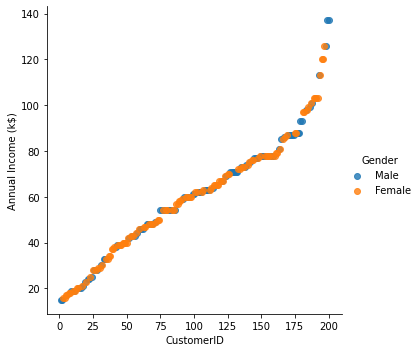

In [0]:
sns.lmplot('CustomerID', 'Annual Income (k$)', data, 'Gender', fit_reg = False)
plt.show()

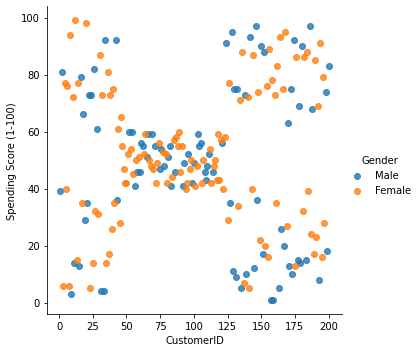

In [0]:
sns.lmplot('CustomerID', 'Spending Score (1-100)', data, 'Gender', fit_reg = False)
plt.show()

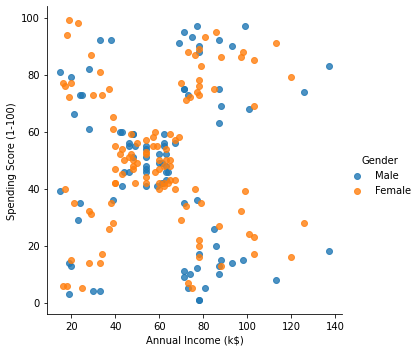

In [0]:
sns.lmplot('Annual Income (k$)', 'Spending Score (1-100)', data, 'Gender', fit_reg = False)
plt.show()

In [0]:
class KMeans:

    def __init__(self, data, k):
        self.data = data
        self.k = k
        index = np.random.choice(len(data), self.k)
        self.centroids = data[index]
        self.output = np.zeros(len(data), dtype = np.int64)

    def __call__(self):
        return self.partition()

    def closest(self, i):
        dist = np.inf
        
        for ind, centroid in enumerate(self.centroids): 
            if np.linalg.norm(centroid - self.data[i]) < dist:
                dist = np.linalg.norm(centroid - self.data[i])
                self.output[i] = ind
        
    def update(self):
        for i in range(len(self.data)):
            self.closest(i)

        count = np.zeros(self.centroids.shape[0])
        self.centroids.fill(0)
        
        for i in range(len(self.data)):
            self.centroids[self.output[i]] += self.data[i]
            count[self.output[i]] += 1

        self.centroids /= count.reshape(-1,1)
 
    def partition(self):
        if(self.centroids is None):
            raise Exception("Feed the data first")

        prev = np.zeros(self.centroids.shape)

        while not (prev == self.centroids).all():
            prev = self.centroids * 1
            self.update()

        return self.output

In [0]:
def norm(data):
    mean = data.mean(axis = 0)
    data -= mean
    std = data.std(axis = 0)
    data /= std

In [0]:
df_id = data[['CustomerID', 'Spending Score (1-100)']]
arr = np.asarray(df_id, dtype = np.float64)
norm(arr)

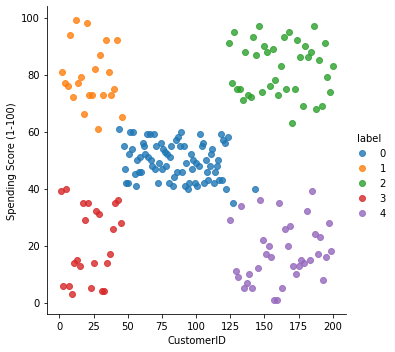

In [0]:
kmeans = KMeans(arr, 5)
df_id['label'] = kmeans()
sns.lmplot('CustomerID', 'Spending Score (1-100)', df_id, 'label', fit_reg = False)

In [0]:
df_inc = data[['Annual Income (k$)', 'Spending Score (1-100)']]
arr = np.asarray(df_inc, dtype = np.float64)
norm(arr)

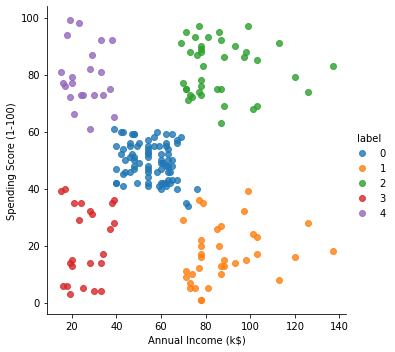

In [0]:
kmeans = KMeans(arr, 5)
df_inc['label'] = kmeans()
sns.lmplot('Annual Income (k$)', 'Spending Score (1-100)', df_inc, 'label', fit_reg = False)

In [0]:
from sklearn.cluster import KMeans as KM
km = KM(n_clusters = 5).fit(arr)

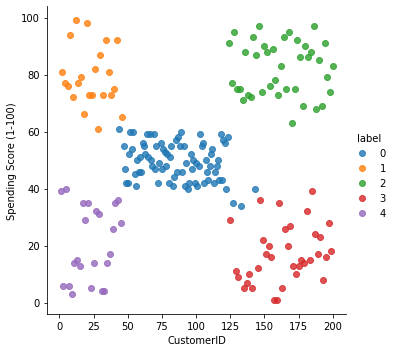

In [0]:
data['label'] = km.predict(arr)
sns.lmplot('CustomerID', 'Spending Score (1-100)', data, 'label', fit_reg = False)

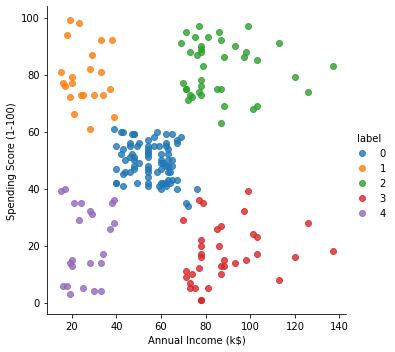

In [0]:
data['label'] = km.predict(arr)
sns.lmplot('Annual Income (k$)', 'Spending Score (1-100)', data, 'label', fit_reg = False)

In [0]:
data.drop('label', axis = 1, inplace = True)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
